In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features_df = pd.read_csv("../../data/gene_df_128.csv")
features_df.head()
label_df = pd.read_csv("../../data/final_labels.csv")
label_df.index = label_df['File ID']

In [3]:
labels = label_df.loc[features_df['file_name']]['LABEL']
labels_more = label_df.loc[features_df['file_name']]['final_label']
projects = label_df.loc[features_df['file_name']]['Project ID']

### Using t-SNE 

/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 954 samples in 0.000s...
[t-SNE] Computed neighbors for 954 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 954 / 954
[t-SNE] Mean sigma: 2.717048
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.651985
[t-SNE] KL divergence after 1000 iterations: 1.378894


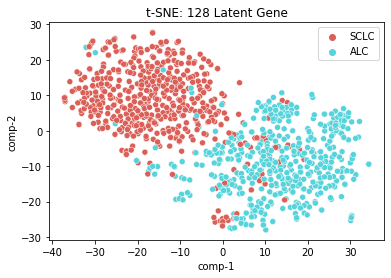

In [4]:
X = features_df.iloc[:,1:]
Y = labels
tsne = TSNE(n_components=2, verbose=1, random_state=14)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["y_more"] = labels_more
df["projects"] = projects
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="t-SNE: 128 Latent Gene")
pt1.get_figure().savefig("../../Figures/tsne_gene_1.png")

## Using PCA

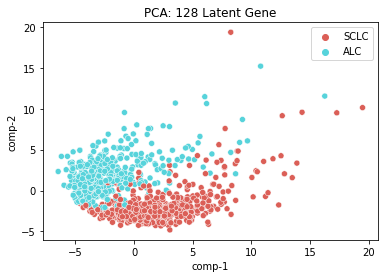

In [5]:
X = features_df.iloc[:,1:]
Y = labels
pca = PCA(n_components=2)
z = pca.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="PCA: 128 Latent Gene")
pt1.get_figure().savefig("../../Figures/pca_gene.png")

In [6]:
pca.explained_variance_ratio_.cumsum()

array([0.15487765, 0.23743615])

## 10 fold cross validation

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlmodels import cross_validate_custom

In [78]:
VC = VotingClassifier(estimators=[('SVM', SVC(kernel = 'rbf', probability=True)),
 ('RF', RandomForestClassifier(n_estimators=100))],voting='soft')

estimators = [SVC(kernel='rbf',probability=True), RandomForestClassifier(n_estimators=100),VC, LogisticRegression()]

In [79]:
result = []
for estimator in estimators:
    result.append(cross_validate_custom(X,Y,estimator))
result = pd.DataFrame(result,index = ['SVM','RF','Voting','LR'])
result


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
SVM,0.943443,0.014748,0.944728,0.014051,0.943967,0.014554,0.943399,0.014762,0.983548,0.007981
RF,0.943487,0.029115,0.944367,0.029196,0.943785,0.029220,0.943431,0.029168,0.983744,0.009228
Voting,0.944485,0.018072,0.945156,0.017952,0.944677,0.018156,0.944428,0.018109,0.984405,0.009892
LR,0.934989,0.017462,0.935703,0.017541,0.934938,0.017345,0.934905,0.017465,0.970452,0.017003
